In [1]:
import gevent.monkey
gevent.monkey.patch_all(thread=False, select=False)
import numpy as np
import torch
from tqdm.auto import tqdm
from transformers import AutoTokenizer, AutoModel
import os
import pandas as pd
from importlib import reload
import src.models.ontology_mapper_st as om_st
import src.Engine.ontology_mapping_engine as ome
import src.models.ontology_mapper_lm as om_lm
import sys
sys.setrecursionlimit(5000)  # Increase as needed
reload(om_st)
reload(ome)
reload(om_lm)

/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhilashdhal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhilashdhal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
USER_AGENT environment variable not set, consider setting it to identify your requests.
[nltk_data] Downloading package 

<module 'src.models.ontology_mapper_lm' from '/Users/abhilashdhal/Desktop/cbioportal_gsoc/OmicsMLRepoHarmonizer/src/models/ontology_mapper_lm.py'>

In [2]:
file_dict = {'treatment': './data/cBioPortal_treatment_name_map.csv', 'bodysite': './data/cBioPortal_bodysite_map.csv', 'disease': './data/cBioPortal_disease_map.csv'}

def get_query_corpus_curamap(file_path):    
    cura_map = pd.read_csv(file_path)
    query_list = cura_map['original_value'].tolist()
    small_corpus_list = cura_map['curated_ontology'].to_list()
    cura_map = dict(zip(query_list, small_corpus_list))
    return {'query': list(np.unique(query_list)), 'corpus': list(np.unique(small_corpus_list)), 'cura_map': cura_map}

## 1. Run experiments for each file in the file_dict (Stage I + Stage II) using Only sap-bert and pubmedbert

In [3]:
other_params = {"test_or_prod": "test"}

def run_experiments_by_model(file_dict, model_name):
    results_dict = {}
    for file_name, file_path in file_dict.items():
        input_dict = get_query_corpus_curamap(file_path)
        query_list, corpus_list, cura_map = input_dict['query'], input_dict['corpus'], input_dict['cura_map']
        onto_engine_large = ome.OntoMapEngine(method=model_name, topk=5,
        query=query_list, corpus=corpus_list,
        cura_map=cura_map, 
        yaml_path='./src/models/method_model.yaml', 
        om_strategy='lm', **other_params)
        
        results_engine_testing = onto_engine_large.run()
        results_dict[file_name] = results_engine_testing
    return results_dict

results_dict_sapbert = run_experiments_by_model(file_dict, 'sap-bert')
results_dict_pubmedbert = run_experiments_by_model(file_dict, 'pubmed-bert')

09/09//2024 01:14:1725867863 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
09/09//2024 01:14:1725867863 PM - INFO - OntoMapEngine: Running Ontology Mapping
09/09//2024 01:14:1725867863 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
09/09//2024 01:14:1725867863 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
09/09//2024 01:14:1725867863 PM - INFO - OntoMapLM: Initialized OntoMap Language Model module
09/09//2024 01:14:1725867863 PM - INFO - OntoMapLM.get_match_results: Creating embeddings for query_list and corpus


/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


09/09//2024 01:14:1725867878 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:14:1725867878 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:14:1725867878 PM - INFO - OntoMapLM.get_match_results: Results Generated
09/09//2024 01:14:1725867878 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
09/09//2024 01:14:1725867878 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
09/09//2024 01:14:1725867878 PM - INFO - OntoMapEngine: Running Ontology Mapping
09/09//2024 01:14:1725867878 PM - INFO - OntoMapEngine: Running Ontology Mapping
09/09//2024 01:14:1725867878 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
09/09//2024 01:14:1725867878 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
09/09//2024 01:14:1725867878 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
09/09//2024 01:14:1725867878 PM - INFO - OntoMapEngine: Running OntoMap model 

/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


09/09//2024 01:14:1725867891 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:14:1725867891 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:14:1725867891 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:14:1725867891 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:14:1725867892 PM - INFO - OntoMapLM.get_match_results: Results Generated
09/09//2024 01:14:1725867892 PM - INFO - OntoMapLM.get_match_results: Results Generated
09/09//2024 01:14:1725867892 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
09/09//2024 01:14:1725867892 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
09/09//2024 01:14:1725867892 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
09/09//2024 01:14:1725867892 PM - INFO - OntoMapEngine: Running Ontology Mapping
09/09//2024 01:14:1725867892 PM - INFO - OntoMapEngine: Running Ontol

/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


09/09//2024 01:15:1725867924 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867924 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867924 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867924 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867924 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867924 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867924 PM - INFO - OntoMapLM.get_match_results: Results Generated
09/09//2024 01:15:1725867924 PM - INFO - OntoMapLM.get_match_results: Results Generated
09/09//2024 01:15:1725867924 PM - INFO - OntoMapLM.get_match_results: Results Generated
09/09//2024 01:15:1725867925 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
09/09//2024 01:15:1725867925 PM - INFO -

/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


09/09//2024 01:15:1725867936 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867936 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867936 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867936 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867936 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867936 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867936 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867936 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867936 PM - INFO - OntoMapLM.get_match_results: Results Generated
09/09//2024 01:15:1725867936 PM - INFO - OntoMapLM.get_match_results: Results Generated
09/09//2024 01:1

/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


09/09//2024 01:15:1725867947 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867947 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867947 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867947 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867947 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:15:1725867947 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867947 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867947 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867947 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:15:1725867947 PM - INFO - OntoMapLM.get_match_results: Generating resu

/opt/homebrew/anaconda3/envs/‘gsoc_harmon_2024’/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


09/09//2024 01:16:1725867976 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:16:1725867976 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:16:1725867976 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:16:1725867976 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:16:1725867976 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:16:1725867976 PM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
09/09//2024 01:16:1725867976 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:16:1725867976 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:16:1725867976 PM - INFO - OntoMapLM.get_match_results: Generating results table
09/09//2024 01:16:1725867976 PM - INFO - OntoMapLM.get_match_results: Gen

In [24]:
results_dict_sapbert['treatment'].head()

,original_value,curated_ontology,match_level,top1_match,top1_score,top2_match,top2_score,top3_match,top3_score,top4_match,top4_score,top5_match,top5_score
0,17-DMAG,Alvespimycin,99,Memantine,0.5213,Polyamine Analogue PG11047,0.4905,Serdemetan,0.4807,Methotrexate,0.4750,Dinaciclib,0.4725
1,19D12,Robatumumab,99,Everolimus,0.4492,MDM2 Inhibitor,0.4417,Cetuximab,0.4298,Trastuzumab,0.4275,PSMA-targeting Agent;Antineoplastic Antibody-D...,0.4266
2,5 fu,Fluorouracil,1,Fluorouracil,0.8909,Floxuridine,0.7742,Fluoropyrimidine,0.7596,Gemcitabine,0.6081,Leucovorin,0.5865
3,5-FU,Fluorouracil,1,Fluorouracil,0.8948,Floxuridine,0.7626,Fluoropyrimidine,0.7557,Gemcitabine,0.6171,Fotemustine,0.5771
4,5-fluorouracil,Fluorouracil,1,Fluorouracil,0.9522,Fluoropyrimidine,0.7612,Floxuridine,0.7425,Gemcitabine,0.5893,Capecitabine,0.5692


## 1.1. Plotting the results

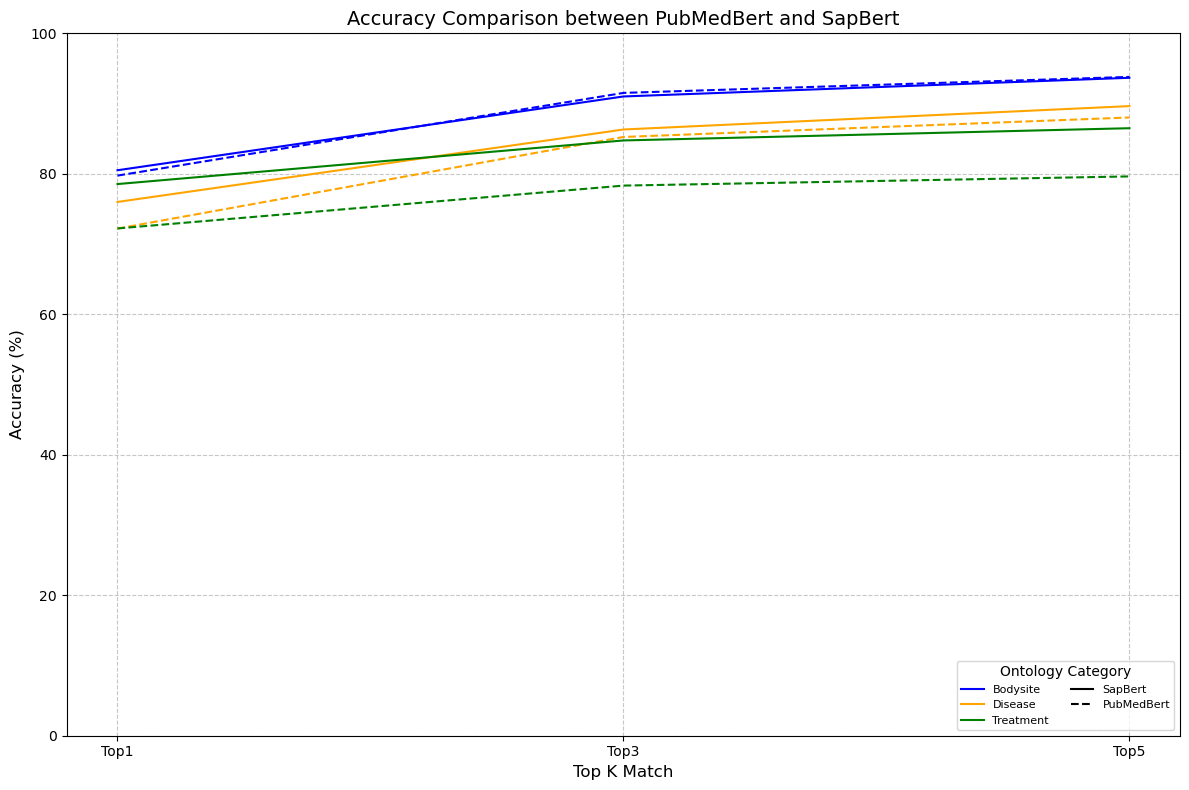

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_accuracy(results_df, top_k):
    correct_matches = 0
    total_rows = len(results_df)
    
    for _, row in results_df.iterrows():
        curated_ontology = row['curated_ontology']
        top_k_matches = [row[f'top{i+1}_match'] for i in range(top_k)]
        if curated_ontology in top_k_matches:
            correct_matches += 1
    
    return (correct_matches / total_rows) * 100

def get_accuracies(results_dict, top_k_values):
    accuracies = {}
    for category, df in results_dict.items():
        accuracies[category] = [calculate_accuracy(df, k) for k in top_k_values]
    return accuracies

# Define parameters
top_k_values = [1, 3, 5]
categories = ['bodysite', 'disease', 'treatment']
models = ['SapBert', 'PubMedBert']
colors = ['blue', 'orange', 'green']

# Calculate accuracies
sapbert_accuracies = get_accuracies(results_dict_sapbert, top_k_values)
pubmedbert_accuracies = get_accuracies(results_dict_pubmedbert, top_k_values)

# Create the plot
plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    sapbert_acc = sapbert_accuracies[category]
    pubmedbert_acc = pubmedbert_accuracies[category]
    
    plt.plot(top_k_values, sapbert_acc, color=colors[i], linestyle='-', label=f'{category} (SapBert)')
    plt.plot(top_k_values, pubmedbert_acc, color=colors[i], linestyle='--', label=f'{category} (PubMedBert)')

plt.xlabel('Top K Match', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy Comparison between PubMedBert and SapBert', fontsize=14)
plt.xticks(top_k_values, [f'Top{k}' for k in top_k_values])
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.7)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], color='blue', label='Bodysite'),
                   plt.Line2D([0], [0], color='orange', label='Disease'),
                   plt.Line2D([0], [0], color='green', label='Treatment'),
                   plt.Line2D([0], [0], color='black', linestyle='-', label='SapBert'),
                   plt.Line2D([0], [0], color='black', linestyle='--', label='PubMedBert')]

plt.legend(handles=legend_elements, loc='lower right', title='Ontology Category', 
           title_fontsize=10, fontsize=8, ncol=2)

plt.tight_layout()
plt.show()

In [5]:
sapbert_accuracies

{'treatment': [78.54030501089323, 84.74945533769062, 86.49237472766885],
 'bodysite': [80.50632911392405, 91.01265822784809, 93.67088607594937],
 'disease': [75.99444958371878, 86.30897317298798, 89.63922294172063]}

In [6]:
pubmedbert_accuracies

{'treatment': [72.22222222222221, 78.32244008714598, 79.62962962962963],
 'bodysite': [79.74683544303798, 91.51898734177215, 93.79746835443038],
 'disease': [72.20166512488436, 85.24514338575393, 88.02035152636448]}

## 1.3. Save the results


In [7]:
import os
import pandas as pd

# Define the output directory
output_dir = './outputs/comparison_of_models/'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to save results for a given model
def save_results(results_dict, model_name):
    for category, df in results_dict.items():
        file_name = f"{model_name}_{category}_non_exact_match_results.csv"
        file_path = os.path.join(output_dir, file_name)
        df.to_csv(file_path, index=False)
        print(f"Saved {file_path}")

# Save results for SapBert
save_results(results_dict_sapbert, "sapbert")

# Save results for PubMedBert
save_results(results_dict_pubmedbert, "pubmedbert")

# If you have results for other models, you can add them here
# For example:
# save_results(results_dict_other_model, "other_model")

print("All results have been saved.")

Saved ./outputs/comparison_of_models/sapbert_treatment_non_exact_match_results.csv
Saved ./outputs/comparison_of_models/sapbert_bodysite_non_exact_match_results.csv
Saved ./outputs/comparison_of_models/sapbert_disease_non_exact_match_results.csv
Saved ./outputs/comparison_of_models/pubmedbert_treatment_non_exact_match_results.csv
Saved ./outputs/comparison_of_models/pubmedbert_bodysite_non_exact_match_results.csv
Saved ./outputs/comparison_of_models/pubmedbert_disease_non_exact_match_results.csv
All results have been saved.


## 2. Run Experiments for different models 

In [ ]:
different_models = ['sap-bert', 'pubmed-bert', 'sap-roberta', 'sap-deberta']